# Data Wrangling

In [98]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib as plt

In [99]:
# loading the drivers data

drivers = pd.read_json('ultimate_data_challenge.json')
drivers.head(5)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [100]:
# Sorting the data by signup data to find the earliest signup date

drivers.sort_values(by='signup_date', ascending=True).head()

# Earliest signup_date 2014-01-01

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
4674,Astapor,2,2014-01-01,NaN,1.0,2014-06-28,iPhone,0.0,False,0.0,4.03,4.0
7672,Winterfell,1,2014-01-01,NaN,1.0,2014-01-01,iPhone,0.0,True,100.0,3.39,5.0
1431,Winterfell,0,2014-01-01,NaN,1.0,2014-06-08,iPhone,0.0,True,66.7,9.76,5.0
15387,Winterfell,2,2014-01-01,5.0,1.0,2014-06-20,Android,0.0,False,54.5,5.03,4.7
17482,Winterfell,0,2014-01-01,3.0,1.5,2014-05-18,iPhone,100.0,False,0.0,3.28,5.0


In [101]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


# Handling Missing Values

In [103]:
# Any null values

drivers.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [6]:
# Dropping null values

drivers = drivers.dropna()
drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41445 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    41445 non-null  object 
 1   trips_in_first_30_days  41445 non-null  int64  
 2   signup_date             41445 non-null  object 
 3   avg_rating_of_driver    41445 non-null  float64
 4   avg_surge               41445 non-null  float64
 5   last_trip_date          41445 non-null  object 
 6   phone                   41445 non-null  object 
 7   surge_pct               41445 non-null  float64
 8   ultimate_black_user     41445 non-null  bool   
 9   weekday_pct             41445 non-null  float64
 10  avg_dist                41445 non-null  float64
 11  avg_rating_by_driver    41445 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 3.8+ MB


# Exploratory Data Analysis

array([[<AxesSubplot:title={'center':'trips_in_first_30_days'}>,
        <AxesSubplot:title={'center':'avg_rating_of_driver'}>,
        <AxesSubplot:title={'center':'avg_surge'}>],
       [<AxesSubplot:title={'center':'surge_pct'}>,
        <AxesSubplot:title={'center':'weekday_pct'}>,
        <AxesSubplot:title={'center':'avg_dist'}>],
       [<AxesSubplot:title={'center':'avg_rating_by_driver'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

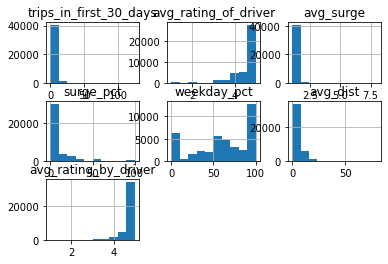

In [7]:
# a quick overview of the distribution of the numerical columns

drivers.hist()

<AxesSubplot:>

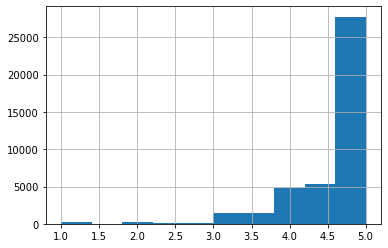

In [8]:
# Majority of ratings by customers are 5 points
drivers['avg_rating_of_driver'].hist()

<AxesSubplot:>

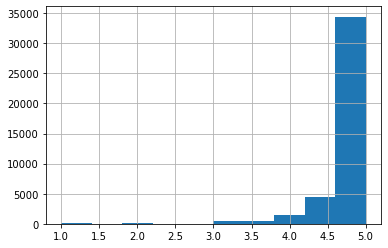

In [9]:
# Majority of rating by drivers are also 5.
drivers['avg_rating_by_driver'].hist()

Most drivers and customers seem to give a 5 rating. 
However, drivers seem to rate customer a little higher than customers rating drivers.

0.2926829268292683


<AxesSubplot:>

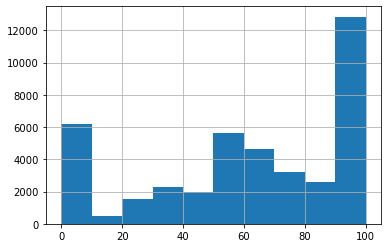

In [93]:
print(12000/41000)
# Some 12,000 drivers (about 29% of drivers) work 98% or more of their time in the weekdays.

drivers['weekday_pct'].hist()

In [95]:
drivers[drivers['weekday_pct'] > 98]['weekday_pct'].count()

12089

Some 12,000 drivers (about 29%) drive mostly during the weekdays.
Some 6,000 drivers (about 15%) drive mostly in the weekends.
The rest of the drivers divide their driving time between weekdays and weekends.

In [12]:
drivers[drivers['weekday_pct'] < 2]['weekday_pct'].count()

6172

# Retained Drivers

In [13]:
drivers['signup_date'] = pd.to_datetime(drivers['signup_date'])
drivers['signup_date'].head()

0   2014-01-25
1   2014-01-29
2   2014-01-06
3   2014-01-10
4   2014-01-27
Name: signup_date, dtype: datetime64[ns]

In [14]:
drivers['last_trip_date'] = pd.to_datetime(drivers['last_trip_date'])
drivers['last_trip_date'].head()

0   2014-06-17
1   2014-05-05
2   2014-01-07
3   2014-06-29
4   2014-03-15
Name: last_trip_date, dtype: datetime64[ns]

In [15]:
# a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

In [16]:
drivers.sort_values(by='last_trip_date', ascending=False).head()
# Latest last trip date = 2014-07-01. I am assuming this is the date the data was taken.

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
24275,King's Landing,7,2014-01-08,4.8,1.00,2014-07-01,iPhone,0.0,True,67.6,2.17,4.7
23681,Astapor,5,2014-01-21,3.1,1.02,2014-07-01,iPhone,7.1,True,75.0,3.14,4.4
4385,King's Landing,0,2014-01-06,4.6,1.08,2014-07-01,iPhone,13.9,True,77.8,2.58,4.7
45155,Winterfell,3,2014-01-28,4.8,1.03,2014-07-01,iPhone,5.7,False,66.0,5.24,4.6
38661,Winterfell,4,2014-01-18,4.4,1.16,2014-07-01,iPhone,28.1,False,65.6,4.07,4.7


In [96]:
# Latest trip date. I will take this as the current date, i.e. the date the data was taken.
drivers['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

In [17]:
drivers['days_since_last_trip'] = (drivers['last_trip_date'].max() - drivers['last_trip_date']).dt.days
drivers.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108


In [18]:
drivers['retained'] = drivers['days_since_last_trip'] <= 30

In [19]:
drivers.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,14,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,57,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,175,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,2,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,108,False


In [20]:
drivers['retained'].value_counts(normalize=True)

False    0.588973
True     0.411027
Name: retained, dtype: float64

Only 41% of the drivers are retained.

# Preparing the data for modeling

### Categorical Columns

In [21]:
drivers['city'].value_counts()

Winterfell        19161
Astapor           13509
King's Landing     8775
Name: city, dtype: int64

In [22]:
drivers['phone'].value_counts()

iPhone     29352
Android    12093
Name: phone, dtype: int64

In [23]:
drivers['ultimate_black_user'] = drivers['ultimate_black_user'].replace({True: 1, False: 0})
drivers['retained'] = drivers['retained'].replace({True: 1, False: 0})
drivers.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,14,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,57,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,175,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,108,0


In [97]:
# One-Hot Encoding city and phone columns

cat_cols = ['city', 'phone']
df = pd.get_dummies(drivers, prefix=['city_', 'phone_'], columns=cat_cols)

In [25]:
df.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,days_since_last_trip,retained,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,14,1,0,1,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,57,0,1,0,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,175,0,1,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,2,1,0,1,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,108,0,0,0,1,1,0


In [26]:
# Dropping unneeded columns

df = df.drop(columns=['signup_date', 'last_trip_date', 'days_since_last_trip'], axis=1)

In [27]:
df.head(3)

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
0,4,4.7,1.1,15.4,1,46.2,3.67,5.0,1,0,1,0,0,1
1,0,5.0,1.0,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0
2,3,4.3,1.0,0.0,0,100.0,0.77,5.0,0,1,0,0,0,1


# Standardizing Numeric Columns

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

to_standardize = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 
                  'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver']

scaler.fit(df[to_standardize])
df[to_standardize] = scaler.transform(df[to_standardize])

In [29]:
df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,city__Astapor,city__King's Landing,city__Winterfell,phone__Android,phone__iPhone
0,0.342505,0.159520,0.131718,0.354838,1,-0.432445,-0.347912,0.552529,1,0,1,0,0,1
1,-0.642890,0.646456,-0.371440,-0.485689,0,-0.323292,0.544197,0.552529,0,1,0,0,1,0
2,0.096156,-0.489729,-0.371440,-0.485689,0,1.112936,-0.911554,0.552529,0,1,0,0,0,1
3,1.574248,-0.002792,0.332981,0.605905,1,0.538445,-0.602523,0.305372,1,0,1,0,0,1
4,2.805992,-0.327417,0.584560,0.158351,0,0.607384,-0.452866,0.305372,0,0,0,1,1,0


# Dividing the data into training and test set

In [30]:
X = df.drop(columns='retained', axis=1)
y = df['retained']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(29011, 13) (12434, 13) (29011,) (12434,)


# Model 1 - Graident Boosting Classifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=300, learning_rate=0.1, max_depth=3)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
y_pred_proba_gb = gb.predict_proba(X_test)[:,1]
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
print(roc_auc_score(y_test, y_pred_proba_gb))

0.8554857235475564


In [35]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
print(cm_gb)

[[6150 1143]
 [1571 3570]]


# Model 2 Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [37]:
y_pred_proba_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
print(roc_auc_score(y_test, y_pred_proba_rf))

0.8212610205985266


In [38]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[5813 1480]
 [1581 3560]]


In [48]:
print(y_pred_proba_gb)

[0.60464251 0.08996432 0.92355013 ... 0.19346809 0.16533576 0.64175966]


# Choosing the best model
The Gradient Boosting Classifier performs better than the Random Forest Model. 
We can adjust the threshold value for the Gradient Boosting Classifier to improve the performance further.


In [47]:
new_pred = pd.DataFrame(y_pred_gb, y_pred_proba_gb)
new_pred = new_pred.reset_index()
new_pred.columns = ['y_pred_gb', 'y_pred_proba_gb']
new_pred.head()

,y_pred_gb,y_pred_proba_gb
0,0.604643,1
1,0.089964,0
2,0.923550,1
3,0.062172,0
4,0.672817,1


In [49]:
#new_pred['new_y_pred'] = 0
#new_pred.head()

,y_pred_gb,y_pred_proba_gb,new_y_pred
0,0.604643,1,0
1,0.089964,0,0
2,0.923550,1,0
3,0.062172,0,0
4,0.672817,1,0


In [63]:
#new_pred['new_y_pred'] = lambda x: 1 if new_pred['y_pred_gb'] > 0.5 else 0
#new_pred['new_y_pred'].apply(lambda x: x if new_pred.y_pred_gb >= 0.5 else x)

#new_pred = new_pred.assign(new_y_pred=lambda x: x if new_pred.y_pred_gb >= 0.5 else x)

#new_pred['new_y_pred'] = np.where(new_pred['y_pred_gb'] > 0.5, new_pred['new_y_pred'], 1)

In [64]:
#new_pred.head()

,y_pred_gb,y_pred_proba_gb,new_y_pred
0,0.604643,1,<function <lambda> at 0x00000223ACE4A9D0>
1,0.089964,0,1
2,0.923550,1,<function <lambda> at 0x00000223ACE4A9D0>
3,0.062172,0,1
4,0.672817,1,<function <lambda> at 0x00000223ACE4A9D0>


In [90]:
# Choosing the optimal threshold value

thresholds = pd.DataFrame(fpr_gb, tpr_gb).reset_index()
thresholds['thresholds_gb'] = thresholds_gb
#thresholds.reset_index()
thresholds.columns = ['fpr_gb', 'tpr_gb', 'thresholds_gb']
thresholds['fpr-tpr'] = thresholds['fpr_gb'] - thresholds['tpr_gb']
thresholds = thresholds.sort_values(by='fpr-tpr', ascending=False)

In [91]:
thresholds

,fpr_gb,tpr_gb,thresholds_gb,fpr-tpr
1914,0.753161,0.203620,0.423350,0.549541
1938,0.756857,0.207322,0.418352,0.549535
1960,0.760552,0.211024,0.413726,0.549528
1937,0.756662,0.207185,0.418435,0.549477
1929,0.755690,0.206225,0.419646,0.549464
...,...,...,...,...
2,0.000778,0.000000,0.979231,0.000778
3,0.000778,0.000137,0.979180,0.000641
1,0.000195,0.000000,0.982494,0.000195
0,0.000000,0.000000,1.982494,0.000000
